<a href="https://colab.research.google.com/github/Many98/real_estate/blob/models/basic_models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#MODELS

In [ ]:
import pandas as pd
df = pd.read_csv('prodej_breality_scraped.csv')
df = df.drop(df.columns[[0,2,4,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,26,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,54,55,56,75,76]], axis=1)
df = df.drop(df.columns[[15,16,17,18,19,22,24,25,27,32]], axis=1)
df['has_parking'] = df['has_parking'].astype('bool')
df['has_loggia'] = df['has_loggia'].astype('bool')
df['has_cellar'] = df['has_cellar'].astype('bool')
df['energy_effeciency'] = df['energy_effeciency'].replace(['A','B','C','D','E','F','G'], [1,2,3,4,5,6,7])
df['ownership'] = df['ownership'].replace(['OSOBNI', 'DRUZSTEVNI','UNDEFINED'], [1,2,0])
df["has_garden"].fillna(0, inplace = True)
df["cellar_area"].fillna(0, inplace = True)
df["loggia_area"].fillna(0, inplace = True)
df["balcony_area"].fillna(0, inplace = True)
df = df.dropna()
X = df['price'].values.reshape(-1,1)
Y = df.drop(df.columns[[0]], axis=1)

#DECISION TREE

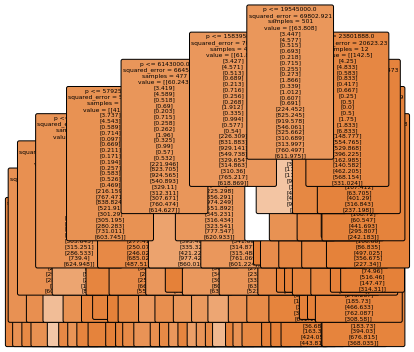

0.21731899407281713

In [ ]:
from sklearn import tree 
import matplotlib.pyplot as plt
clf = tree.DecisionTreeRegressor(max_depth=7, random_state = 0) # 15 = 0.6, 20 = 0.7, 5 = 0.15
clf = clf.fit(X, Y)
# clf.predict([[1, 1]])
_ = tree.plot_tree(clf, feature_names = 'price', filled=True, fontsize=6, rounded = True)
plt.show()
clf.score(X, Y)

#BASIC REGRESSION

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression().fit(X,Y) # -> ERROR
r_sq = model.score(X,Y)
print(f"coefficient of determination: {r_sq}")
# y_pred = model.predict(x)
# print(f"predicted response:\n{y_pred}")

coefficient of determination: 0.03841673300731108


#NEAREST K-NEIGH. REGRESSION

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
neigh = KNeighborsRegressor(n_neighbors=2)
neigh.fit(X, Y)
neigh.score(X, Y, sample_weight=None)
# print(neigh.predict([[1.5]]))

0.4090270420169791

#NN

In [ ]:
from sklearn.neural_network import MLPRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=1)
regr = MLPRegressor(random_state=1, max_iter=500).fit(X_train, y_train)
# regr.predict(X_test[:2])
regr.score(X_test, y_test)

-1.4413799590349543